# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


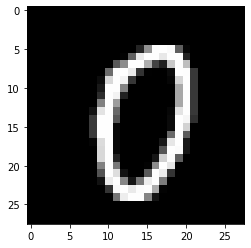

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
x_train_gte5 = X_train[y_train >= 5]
x_test_gte5 = X_test[y_test >= 5]
y_train_gte5 = y_train[y_train >= 5]
y_test_gte5 = y_test[y_test >= 5] 
x_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]


## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [5]:
print (x_train_gte5.shape)
print (y_train_gte5.shape )
print (x_test_gte5.shape)
print (y_test_gte5.shape)
print (x_train_lt5.shape)
print (y_train_lt5.shape)
print (x_test_lt5.shape)
print (y_test_lt5.shape)


(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)
(30596, 28, 28)
(30596,)
(5139, 28, 28)
(5139,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
x_train = (x_train_lt5, y_train_lt5)[0].reshape(((x_train_lt5, y_train_lt5)[0].shape[0],) + (28, 28, 1))
x_test = (x_test_lt5, y_test_lt5)[0].reshape(((x_test_lt5, y_test_lt5)[0].shape[0],) + (28, 28, 1))


## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [8]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
import keras
num_classes=5
y_train = keras.utils.to_categorical((x_train_lt5, y_train_lt5)[1], num_classes)
y_test = keras.utils.to_categorical((x_test_lt5, y_test_lt5)[1], num_classes)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [10]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
filters = 32
pool_size = 2
kernel_size = 3
input_shape = (28,28,1)
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.2),
    Flatten(),
]

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [12]:
model = Sequential(feature_layers + classification_layers)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30596 samples, validate on 5139 samples
Epoch 1/10





30596/30596 [==============================] - 4s 119us/step - loss: 0.5768 - acc: 0.8103 - val_loss: 0.1296 - val_acc: 0.9607
Epoch 2/10
30596/30596 [==============================] - 1s 45us/step - loss: 0.1884 - acc: 0.9426 - val_loss: 0.0924 - val_acc: 0.9716
Epoch 3/10
30596/30596 [==============================] - 1s 44us/step - loss: 0.1541 - acc: 0.9532 - val_loss: 0.1485 - val_acc: 0.9480
Epoch 4/10
30596/30596 [==============================] - 1s 45us/step - loss: 0.1403 - acc: 0.9574 - val_loss: 0.0689 - val_acc: 0.9798
Epoch 5/10
30596/30596 [==============================] - 1s 45us/step - loss: 0.1242 - acc: 0.9619 - val_loss: 0.0597 - val_acc: 0.9823
Epoch 6/10
30596/30596 [==============================] - 1s 44us/step - loss: 0.1154 - acc: 0.9651 - val_loss: 0.0530 - val_acc: 0.9835
Epoch 7/10
30596/30596 [==

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [15]:
model.evaluate(x_test, y_test, verbose=0)

[0.041178271356382176, 0.9883245767659078]

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
for l in feature_layers:
    l.trainable = False

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:

y_train_gte5 = y_train_gte5 - 5
y_test_gte5 = y_test_gte5 - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:

x_train_gte5 = x_train_gte5.reshape((x_train_gte5.shape[0],) + (28, 28, 1))
x_test_gte5 = x_test_gte5.reshape((x_test_gte5.shape[0],) + (28, 28, 1))


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train_gte5 = x_train_gte5.astype('float32')
x_test_gte5 = x_test_gte5.astype('float32')
x_train_gte5 /= 255
x_test_gte5 /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [20]:
print('x_train shape:', x_train_gte5.shape)
print(x_train_gte5.shape[0], 'train samples')
print(x_test_gte5.shape[0], 'test samples')

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [24]:
num_classes=5
print(y_train_gte5.shape)
print(y_test_gte5.shape)
y_train_gte5 = keras.utils.to_categorical(y_train_gte5, num_classes)
y_test_gte5 = keras.utils.to_categorical(y_test_gte5, num_classes)

(29404,)
(4861,)


### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [25]:
model.fit(x_train_gte5, y_train_gte5,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(x_test_gte5, y_test_gte5))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 1s 48us/step - loss: 0.5899 - acc: 0.8014 - val_loss: 0.2266 - val_acc: 0.9282
Epoch 2/10
29404/29404 [==============================] - 1s 45us/step - loss: 0.3088 - acc: 0.9012 - val_loss: 0.1720 - val_acc: 0.9457
Epoch 3/10
29404/29404 [==============================] - 1s 45us/step - loss: 0.2535 - acc: 0.9194 - val_loss: 0.1350 - val_acc: 0.9572
Epoch 4/10
29404/29404 [==============================] - 1s 45us/step - loss: 0.2217 - acc: 0.9310 - val_loss: 0.1238 - val_acc: 0.9607
Epoch 5/10
29404/29404 [==============================] - 1s 45us/step - loss: 0.2020 - acc: 0.9340 - val_loss: 0.1104 - val_acc: 0.9648
Epoch 6/10
29404/29404 [==============================] - 1s 47us/step - loss: 0.1890 - acc: 0.9400 - val_loss: 0.1011 - val_acc: 0.9650
Epoch 7/10
29404/29404 [==============================] - 1s 46us/step - loss: 0.1774 - acc: 0.9429 - val_loss: 0.0989 - val_acc:

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [26]:
model.evaluate(x_test_gte5, y_test_gte5, verbose=0)

[0.08333534781235379, 0.9705821848705309]

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
import pandas as pd
tw = pd.read_csv("tweets.csv",encoding = "latin-1")

### Drop null values
- drop all the rows with null values

In [29]:
tw.dropna()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [30]:
tw.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
size= tw['tweet_text'].size
import re
for i in range(0,size):
  tw.tweet_text[i]= re.sub("[^a-zA-z0-9#+_\s]", '',str(tw.tweet_text[i]))
  tw.tweet_text[i]=tw.tweet_text[i].lower()
  tw.is_there_an_emotion_directed_at_a_brand_or_product[i]= re.sub("[^a-zA-z0-9#+_\s]", '',str(tw.is_there_an_emotion_directed_at_a_brand_or_product[i]))
  tw.is_there_an_emotion_directed_at_a_brand_or_product[i]=tw.is_there_an_emotion_directed_at_a_brand_or_product[i].lower()

print dataframe

In [32]:
tw.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iPhone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,iPad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,Google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
twc = tw[(tw['is_there_an_emotion_directed_at_a_brand_or_product']=="positive emotion")|(tw['is_there_an_emotion_directed_at_a_brand_or_product']=="negative emotion")]

In [34]:
twc['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2978
negative emotion     570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [35]:

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
twc['is_there_an_emotion_directed_at_a_brand_or_product']= label_encoder.fit_transform(twc['is_there_an_emotion_directed_at_a_brand_or_product']) 
twc['is_there_an_emotion_directed_at_a_brand_or_product'].unique() 

array([0, 1])

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = twc["tweet_text"]
y = twc["is_there_an_emotion_directed_at_a_brand_or_product"]

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2)

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [0]:

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
model1 = GaussianNB()



### Fit the classifer
- fit naive bayes classifier

In [42]:
model1.fit(X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_predict_logs = model.predict(X_test)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_predict_nav = model1.predict(X_test.toarray())

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [45]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8658399098083427


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [46]:
model1_score = model1.score(X_test.toarray(), y_test)
print(model1_score)

0.8196166854565953
